#  Question No. 1: Bayes Theorem                    
  

# a)

In [6]:
# Given probabilities                                                                                                    
  
  
P_pos_given_D = 0.009     # P(+ | D)                                                                                 
P_pos_given_not_D = 0.099 # P(+ | -D)
P_neg_given_D = 0.001     # P(- | D)                                         
P_neg_given_not_D = 0.891 # P(- | -D)                                     
  
P_D = P_pos_given_D + P_neg_given_D      # P(D)                    
P_not_D = 1 - P_D         # P(-D)                                        
  
  

# Calculate P(+), the total probability of a positive test result
P_pos = (P_pos_given_D * P_D) + (P_pos_given_not_D * P_not_D)

# Apply Bayes' Theorem to calculate P(D | +)
P_D_given_pos = (P_pos_given_D * P_D) / P_pos                    

print(f"Total probability of a positive test result:\n P(+): {P_pos:.4f}")              # Total probability of a positive test result                                        
print(f"Probability of having a positive test given you have the disease:\n P(+ | D): {P_pos_given_D:.4f}")  # Probability of having a positive test given you have the disease                                                                                                                                          
print(f"Probability of having the disease given a positive test:\n P(D | +): {P_D_given_pos:.4f}")  # Probability of having the disease given a positive test                                                                                                                        
  

Total probability of a positive test result:
 P(+): 0.0981
Probability of having a positive test given you have the disease:
 P(+ | D): 0.0090
Probability of having the disease given a positive test:
 P(D | +): 0.0009


# b)

In [7]:
# Given probabilities                                                                                                    
  
  
  
  
P_A1 = 0.7  # P(Spam)
P_A2 = 0.2  # P(Low priority)
P_A3 = 0.1  # P(High priority)

# Assuming 
P_B_given_A1 = 0.7  # P(Free | Spam)
P_B_given_A2 = 0.2  # P(Free | Low priority)
P_B_given_A3 = 0.01  # P(Free | High priority)

# Calculate P(B), the total probability that the word free appears in any email
P_B = (P_B_given_A1 * P_A1) + (P_B_given_A2 * P_A2) + (P_B_given_A3 * P_A3)

# Apply Bayes' Theorem to calculate P(A1 | B)
P_A1_given_B = (P_B_given_A1 * P_A1) / P_B                    

print(f"Total probability that the word free appears:\n P(B): {P_B:.4f}")                # Total probability that the word free appears                                                            
print(f"Probability that the email is spam given it contains the word free:\n P(A1 | B): {P_A1_given_B:.4f}")  # Probability that the email is spam given it contains free                                                            
                    

Total probability that the word free appears:
 P(B): 0.5310
Probability that the email is spam given it contains the word free:
 P(A1 | B): 0.9228


# Question No. 2: Bayesian Belief Network                                        

In [8]:
import  pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset
data = {
    'Mileage': ['Hi', 'Hi', 'Hi', 'Hi', 'Lo', 'Lo', 'Lo', 'Lo'],
    'Engine': ['Good', 'Good', 'Bad', 'Bad', 'Good', 'Good', 'Bad', 'Bad'],
    'Air Conditioner': ['Working', 'Broken', 'Working', 'Broken', 'Working', 'Broken', 'Working', 'Broken'],
    'Car Value Hi': [3, 1, 1, 0, 5, 1, 0, 0],
    'Car Value Lo': [4, 2, 5, 4, 0, 2, 1, 2]
}

df = pd.DataFrame(data)

# Calculate the prior probabilities for Mileage and Air Conditioner
P_Mileage_Hi = len(df[df['Mileage'] == 'Hi']) / len(df)
P_Mileage_Lo= 1-P_Mileage_Hi
df['Hi']=P_Mileage_Hi 
df['Lo']=P_Mileage_Lo

P_Air_Working = len(df[df['Air Conditioner'] == 'Working']) / len(df)
P_Air_Broken = 1- P_Air_Working
df['Working']=P_Air_Working
df['Broken']=P_Air_Broken

# Calculate conditional probabilities for Engine given Mileage
P_Engine_given_Mileage = df.groupby(['Mileage', 'Engine']).size() / df.groupby(['Mileage']).size()
P_Engine_given_Mileage = P_Engine_given_Mileage.unstack()

# Calculate conditional probabilities for Car Value given Mileage, Engine, and Air Conditioner
df['Total'] = df['Car Value Hi'] + df['Car Value Lo']
P_CarValue_given_Conditions_Hi = df['Car Value Hi'] / df['Total']
P_CarValue_given_Conditions_Lo = 1- P_CarValue_given_Conditions_Hi

# Mileage CPT (Prior probabilities)
print("P(Mileage):")
print(df[['Hi','Lo']].drop_duplicates())
print()

# Air Conditioner CPT (Prior probabilities)
print("P(Air Conditioner):")
print(df[['Working','Broken']].drop_duplicates())
print()

# Engine given Mileage CPT
print("P(Engine|Mileage):")
print(P_Engine_given_Mileage)
print()

# Car Value given Mileage, Engine, and Air Conditioner CPT

df['P(CarValue|M,E,A)=Hi'] = P_CarValue_given_Conditions_Hi
df['P(CarValue|M,E,A)=Lo'] = P_CarValue_given_Conditions_Lo

print("P(Car Value|Mileage,Engine,Air Conditioner):")
print(df[['Mileage', 'Engine', 'Air Conditioner', 'P(CarValue|M,E,A)=Hi', 'P(CarValue|M,E,A)=Lo']])
print()


P(Mileage):
    Hi   Lo
0  0.5  0.5

P(Air Conditioner):
   Working  Broken
0      0.5     0.5

P(Engine|Mileage):
Engine   Bad  Good
Mileage           
Hi       0.5   0.5
Lo       0.5   0.5

P(Car Value|Mileage,Engine,Air Conditioner):
  Mileage Engine Air Conditioner  P(CarValue|M,E,A)=Hi  P(CarValue|M,E,A)=Lo
0      Hi   Good         Working              0.428571              0.571429
1      Hi   Good          Broken              0.333333              0.666667
2      Hi    Bad         Working              0.166667              0.833333
3      Hi    Bad          Broken              0.000000              1.000000
4      Lo   Good         Working              1.000000              0.000000
5      Lo   Good          Broken              0.333333              0.666667
6      Lo    Bad         Working              0.000000              1.000000
7      Lo    Bad          Broken              0.000000              1.000000



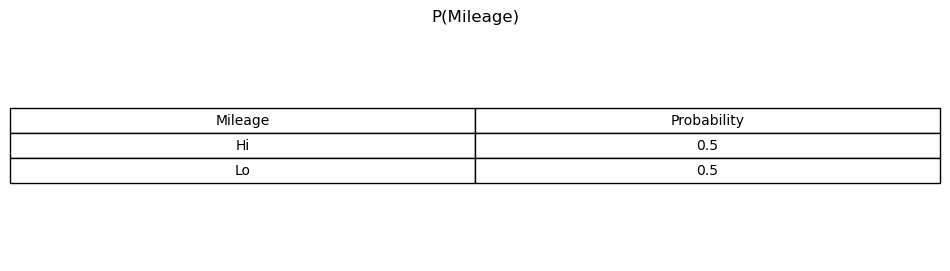

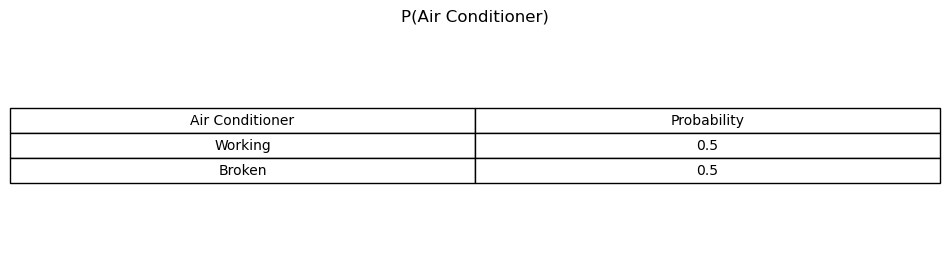

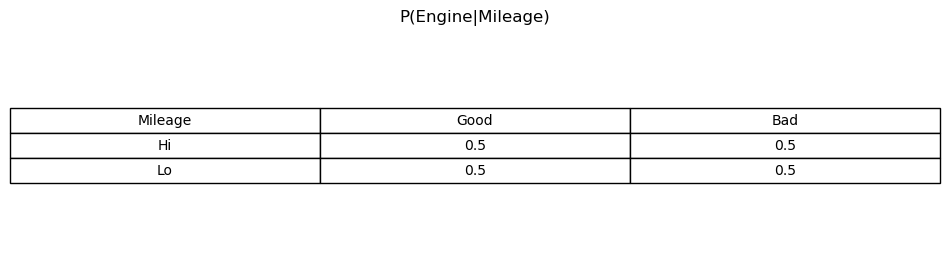

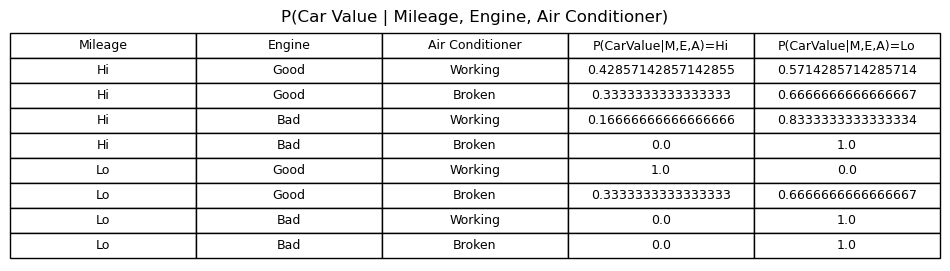

In [9]:
# Function to create and display tables
def plot_table(data, columns, title, font_size=10, scale=(1.5, 1.5)):
    fig, ax = plt.subplots(figsize=(8, 3)) 
    ax.axis('tight')
    ax.axis('off')

    table = ax.table(cellText=data, colLabels=columns, cellLoc='center', loc='center')
    table.set_fontsize(font_size)
    table.scale(scale[0], scale[1]) 

    plt.title(title)
    plt.show()


# Table for Prior Probabilities of Mileage 
mileage_data = [['Hi', P_Mileage_Hi], ['Lo', P_Mileage_Lo]]
mileage_columns = ['Mileage', 'Probability']
plot_table(mileage_data, mileage_columns, "P(Mileage)")


# Table for Prior Probabilities of Air Conditioner
ac_data = [['Working', P_Air_Working], ['Broken', P_Air_Broken]]
ac_columns = ['Air Conditioner', 'Probability']
plot_table(ac_data, ac_columns, "P(Air Conditioner)")


#  Table for Conditional Probabilities: Engine given Mileage 
engine_data = P_Engine_given_Mileage.reset_index().values 
engine_columns = ['Mileage', 'Good', 'Bad']
plot_table(engine_data, engine_columns, "P(Engine|Mileage)")


# Table for Conditional Probabilities: Car Value given Conditions 
car_value_data = df[['Mileage', 'Engine', 'Air Conditioner', 'P(CarValue|M,E,A)=Hi', 'P(CarValue|M,E,A)=Lo']].values
car_value_columns = ['Mileage', 'Engine', 'Air Conditioner', 'P(CarValue|M,E,A)=Hi', 'P(CarValue|M,E,A)=Lo']
plot_table(car_value_data, car_value_columns, "P(Car Value | Mileage, Engine, Air Conditioner)", font_size=10, scale=(1.5, 1.5))

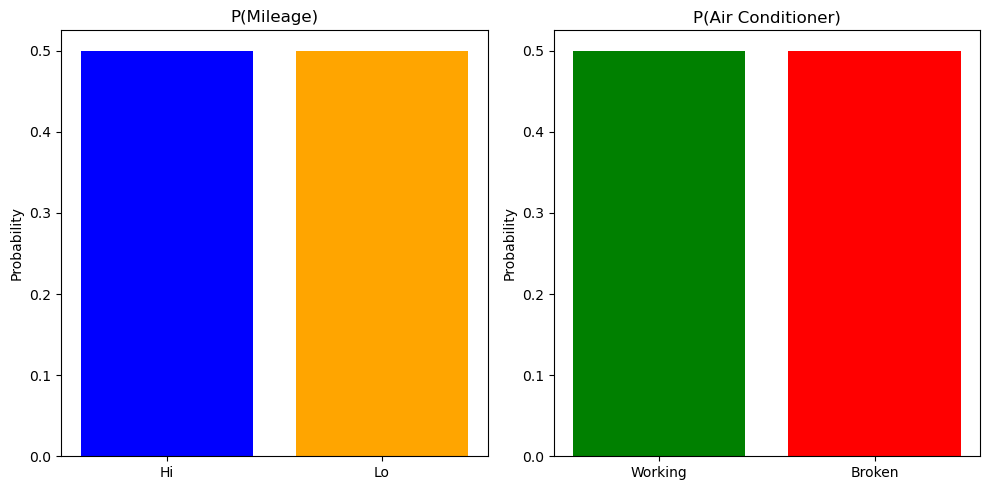

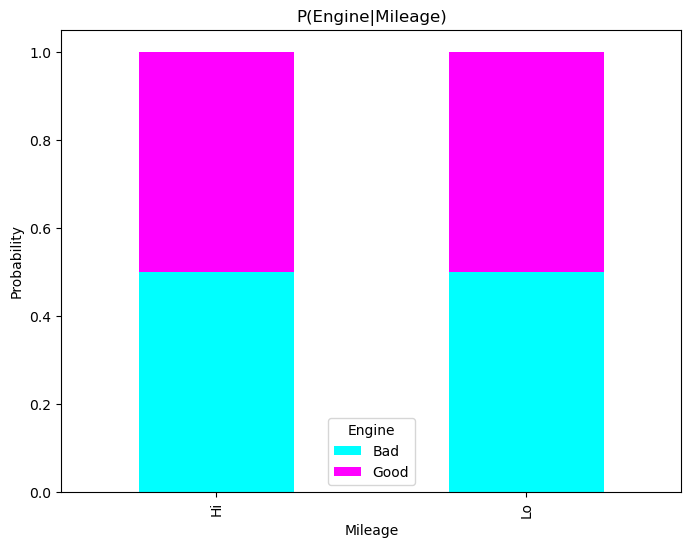

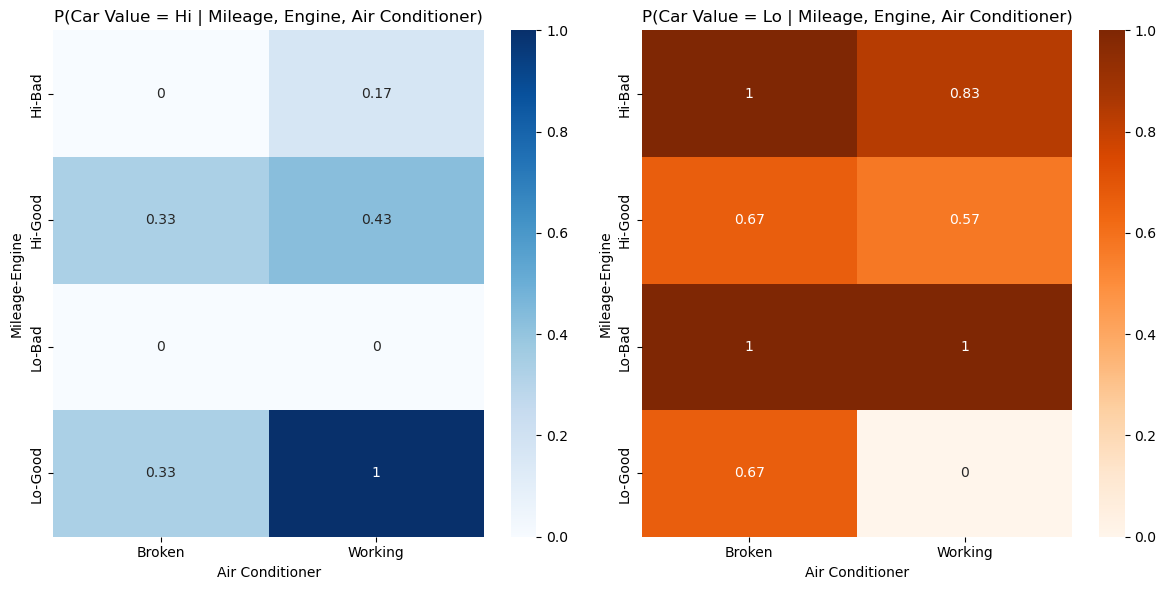

In [10]:
# Bar Chart for Prior Probabilities
# Mileage Prior
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(['Hi', 'Lo'], [P_Mileage_Hi, P_Mileage_Lo], color=['blue', 'orange'])
plt.title('P(Mileage)')
plt.ylabel('Probability')

# Air Conditioner Prior
plt.subplot(1, 2, 2)
plt.bar(['Working', 'Broken'], [P_Air_Working, P_Air_Broken], color=['green', 'red'])
plt.title('P(Air Conditioner)')
plt.ylabel('Probability')

plt.tight_layout()
plt.show()

# Stacked Bar Chart for Conditional Probabilities 
# Engine given Mileage

P_Engine_given_Mileage.plot(kind='bar', stacked=True, color=['cyan', 'magenta'], figsize=(8, 6))
plt.title('P(Engine|Mileage)')
plt.ylabel('Probability')
plt.xlabel('Mileage')
plt.show()

#  Heatmap for Car Value Conditional Probabilities 

heatmap_data_hi = df.pivot_table(values='P(CarValue|M,E,A)=Hi', index=['Mileage', 'Engine'], columns='Air Conditioner')
heatmap_data_lo = df.pivot_table(values='P(CarValue|M,E,A)=Lo', index=['Mileage', 'Engine'], columns='Air Conditioner')

# Plot Heatmap for P(Car Value Hi)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.heatmap(heatmap_data_hi, annot=True, cmap="Blues", cbar=True)
plt.title('P(Car Value = Hi | Mileage, Engine, Air Conditioner)')

# Plot Heatmap for P(Car Value Lo)
plt.subplot(1, 2, 2)
sns.heatmap(heatmap_data_lo, annot=True, cmap="Oranges", cbar=True)
plt.title('P(Car Value = Lo | Mileage, Engine, Air Conditioner)')

plt.tight_layout()
plt.show()


# Question No. 3: Bayesian Classification

In [11]:
# Training set D                                        
  
  
training_set = [
    (1, 1, 1, '+'),
    (1, 0, 1, '-'),
    (0, 1, 0, '-'),
    (0, 0, 1, '-')
]


def calculate_priors(training_set):
    positive_count = 0
    negative_count = 0
    total_count = len(training_set)
    
    
    for example in training_set:
        if example[3] == '+':
            positive_count += 1
        else:
            negative_count += 1
    
   
    P_plus = positive_count / total_count
    P_minus = negative_count / total_count
    return P_plus, P_minus


# Hypothesis h1
def h1_likelihood(x, label):
    if x[0] == 1:
        return 4/5 if label == '+' else 1/5
    else:
        return 1/5 if label == '+' else 4/5

# Hypothesis h2
def h2_likelihood(x, label):
    if x[1] == 1:
        return 4/5 if label == '+' else 1/5
    else:
        return 1/5 if label == '+' else 4/5

# Hypothesis h3
def h3_likelihood(x, label):
    if x[0] == x[1] == x[2]:
        return 2/3 if label == '+' else 1/3
    else:
        return 1/3 if label == '+' else 2/3


def calculate_likelihood(x, label):
    
    likelihood_h1 = h1_likelihood(x, label)
    likelihood_h2 = h2_likelihood(x, label)
    likelihood_h3 = h3_likelihood(x, label)
    
   
    return likelihood_h1 * likelihood_h2 * likelihood_h3

def naive_bayes_classification(training_set, x):

    P_plus, P_minus = calculate_priors(training_set)
    
    
    likelihood_plus = calculate_likelihood(x, '+')
    likelihood_minus = calculate_likelihood(x, '-')
    

    posterior_plus = likelihood_plus * P_plus
    posterior_minus = likelihood_minus * P_minus
    

    if posterior_plus > posterior_minus:
        classification = '+'
    else:
        classification = '-'
    
    return classification, posterior_plus, posterior_minus


x = (1, 1, 0)


classification, posterior_plus, posterior_minus = naive_bayes_classification(training_set, x)


print(f"Posterior probability for +: {posterior_plus}")
print(f"Posterior probability for -: {posterior_minus}")
print(f"Naive Bayes classification: {classification}")


Posterior probability for +: 0.053333333333333344
Posterior probability for -: 0.020000000000000004
Naive Bayes classification: +
